# **AP157 Image Processing Lab Assignment**
### Module B2: Fourier Transform Applications in Image Processing

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Paul Kenneth H. Remo \
_Student No._: 2020-01185\
_Section_ TX1:

### Submission Information

_Date and Time Submitted (most recent upload)_:04/18/2024 : 2:10PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: PAUL KENNETH H. REMO**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/20
* Part 3 - []/20
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from matplotlib.patches import Circle
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import random

import cv2

#### PART 1 - Apply 2D FFT on simple apertures *(30 points)*

1. [15 pts.] Rectangular apertures with (width, height):
- (50, 20) pixels
- (20, 50) pixels
2. [15 pts.] Circular apertures with radii:
- 5 pixels
- 10 pixels
- 20 pixels

For each aperture type, perform the following steps:

- **Step 1: Define Input Aperture**
  - Generate a 2D array representing a rectangle/circle with the specified size within a square grid of size 128 pixels (representing an optical system, for example).
  
- **Step 2: Compute Fourier Transform**
  - Use the Fast Fourier Transform (FFT) algorithm to compute the Fourier transform of the input aperture.

- **Step 3: Shift the FFT**
  - Shift the zero frequency component of the Fourier transform to the center.

- **Step 4: Visualization (Plotting)**
  - Plot the original aperture.
  - Plot the magnitude of the shifted Fourier transform.
  - Plot the log-scaled magnitude of the shifted Fourier transform.
  - Add colorbars to the plots for reference.

- **Step 5: Display**
  - Display the plots in a single figure with three subplots (original aperture, FFT magnitude, log-scaled FFT magnitude).



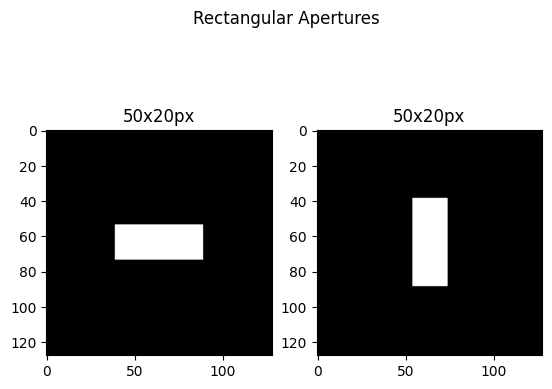

In [3]:
#Making rectangular apertures
x = np.linspace(1, 128, 128)
X, Y = np.meshgrid(x, x)
Y[:] = 0
X[:] = 0
midY = int(len(Y)/2)
apr1 = np.zeros_like(Y)
apr2 = np.zeros_like(Y)
apr1[(midY-10):(midY+10),(midY-25):(midY+25)] = 1
apr2[(midY-25):(midY+25),(midY-10):(midY+10)] = 1
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Rectangular Apertures')
ax1.imshow(apr1, cmap = 'gray')
ax1.title.set_text('50x20px')
ax2.imshow(apr2, cmap = 'gray')
ax2.title.set_text('50x20px')

The resulting rectangular apertures in a 128x128px grid

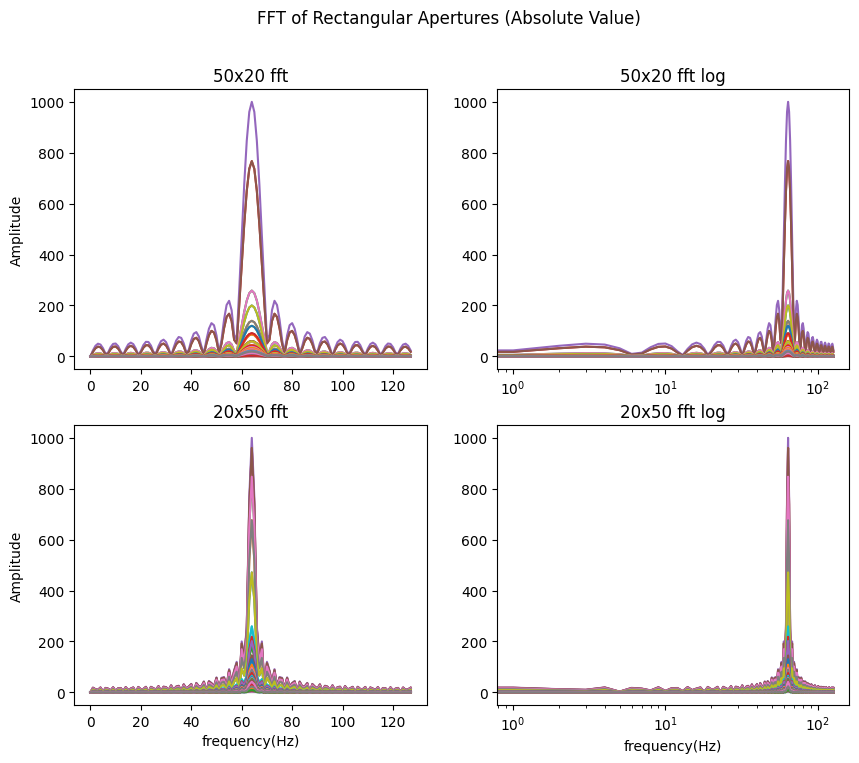

In [4]:
#Now we get the fftshifted values in the linear and log scales
ffta1 = fft2(apr1)
ffts1 = fftshift(ffta1)
ffta2 = fft2(apr2)
ffts2 = fftshift(ffta2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = [10, 8])
fig.suptitle('FFT of Rectangular Apertures (Absolute Value)')
ax1.plot(abs(ffts1))
ax1.set_ylabel('Amplitude')
ax1.title.set_text('50x20 fft')
ax2.plot(abs(ffts1))
ax2.set_xscale('log')
ax2.title.set_text('50x20 fft log')
ax3.plot(abs(ffts2))
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('Amplitude')
ax3.title.set_text('20x50 fft')
ax4.plot(abs(ffts2))
ax4.set_xscale('log')
ax4.set_xlabel('frequency(Hz)')
ax4.title.set_text('20x50 fft log')
plt.show()

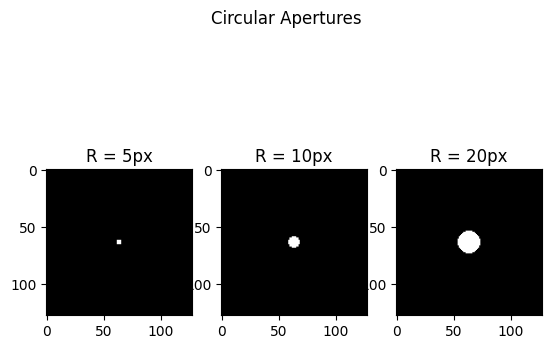

In [5]:
#We now move to the circular apertures
r1 = 0.0391
r2 = 0.0781
r3 = 0.1562
N = 128

#Set a new grid
xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx)
R = np.sqrt(X**2 + Y**2)

A1 = np.zeros(np.shape(R))
A2 = np.zeros(np.shape(R))
A3 = np.zeros(np.shape(R))

A1[np.where(R < r1)] = 1
A2[np.where(R < r2)] = 1
A3[np.where(R < r3)] = 1

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Circular Apertures')
ax1.imshow(A1, cmap = 'gray')
ax1.title.set_text('R = 5px')
ax2.imshow(A2, cmap = 'gray')
ax2.title.set_text('R = 10px')
ax3.imshow(A3, cmap = 'gray')
ax3.title.set_text('R = 20px')


Circular apertures in a 128x128px canvas

In [6]:
fftb1 = fft2(A1)
fftb2 = fft2(A2)
fftb3 = fft2(A3)
fftsb1 = fftshift(fftb1)
fftsb2 = fftshift(fftb2)
fftsb3 = fftshift(fftb3)

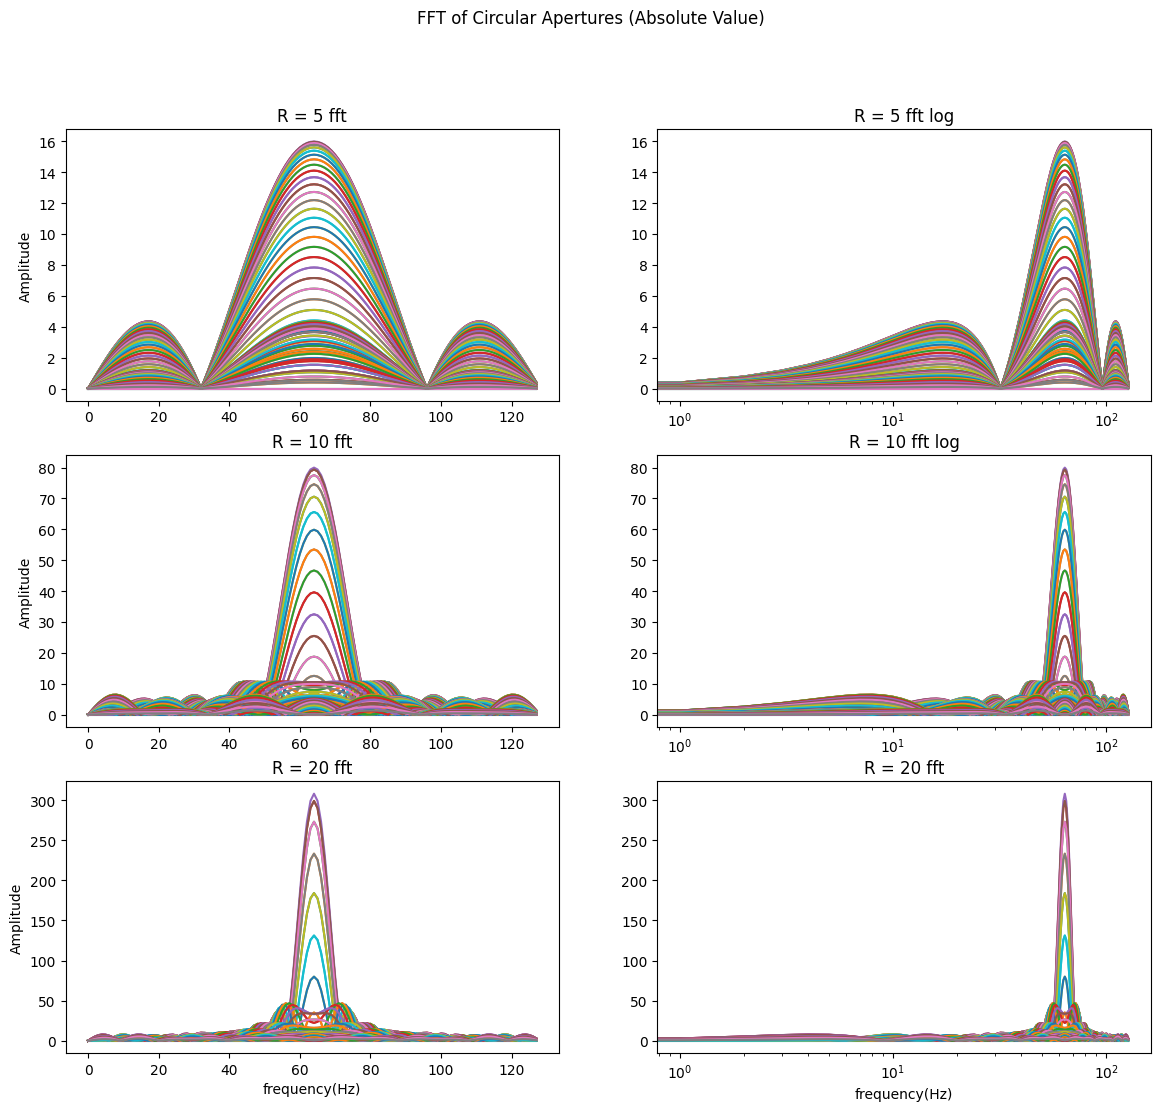

In [7]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = [14, 12])
fig.suptitle('FFT of Circular Apertures (Absolute Value)')
ax1.plot(abs(fftsb1))
ax1.set_ylabel('Amplitude')
ax1.title.set_text('R = 5 fft')
ax2.plot(abs(fftsb1))
ax2.set_xscale('log')
ax2.title.set_text('R = 5 fft log')
ax3.plot(abs(fftsb2))
ax3.set_ylabel('Amplitude')
ax3.title.set_text('R = 10 fft')
ax4.plot(abs(fftsb2))
ax4.set_xscale('log')
ax4.title.set_text('R = 10 fft log')
ax5.plot(abs(fftsb3))
ax5.set_xlabel('frequency(Hz)')
ax5.set_ylabel('Amplitude')
ax5.title.set_text('R = 20 fft')
ax6.plot(abs(fftsb3))
ax6.set_xscale('log')
ax6.set_xlabel('frequency(Hz)')
ax6.title.set_text('R = 20 fft')
plt.show()

In [8]:
from skimage import color, data, exposure
from skimage.transform import rescale
import cv2

#### PART 2 - Convolution *(20 points)*

Now that we've shown that FT acts as if an imaging system, suppose we have an image and convolve it with a circular aperture with different radii. Assuming that the circular aperture is a camera lens, we want to show how the reconstruction of the original image can be limited by the properties of the camera lens (or any imaging device) such as aperture size.

Take the astronaut image from skimage and convolve it with circular apertures of radii: 8, 32, and 64 pixels.

To do this, you can perform the ff. steps:

- **Compute Fourier Transform of Image:**
  - Use `fft2` to compute the 2D Fourier Transform of the input image.
  
- **Compute Fourier Transform of Aperture:**
  - Use `fftshift` to shift the zero-frequency component to the center.

- **Perform Element-wise Multiplication in Frequency Domain:**
  - Multiply the Fourier Transform of the image and the shifted aperture element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the product from the previous step.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the aperture, and the convolution result.

In [9]:
#Load the photos
img = color.rgb2gray(data.astronaut())*256
img_pad = cv2.copyMakeBorder(img, 8, 8, 8, 8, borderType= cv2.BORDER_DEFAULT)

In [10]:
#Set the radii of the apertures
R1 = 0.015625
R2 = 0.0625
R3 = 0.125
N = 512
#Set the canvas for the aperture
xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx)
R = np.sqrt(X**2 + Y**2)

a1 = np.zeros([len(R), len(R)])
a2 = np.zeros([len(R), len(R)])
a3 = np.zeros([len(R), len(R)])

a1[np.where(R < R1)] = 1
a2[np.where(R < R2)] = 1
a3[np.where(R < R3)] = 1

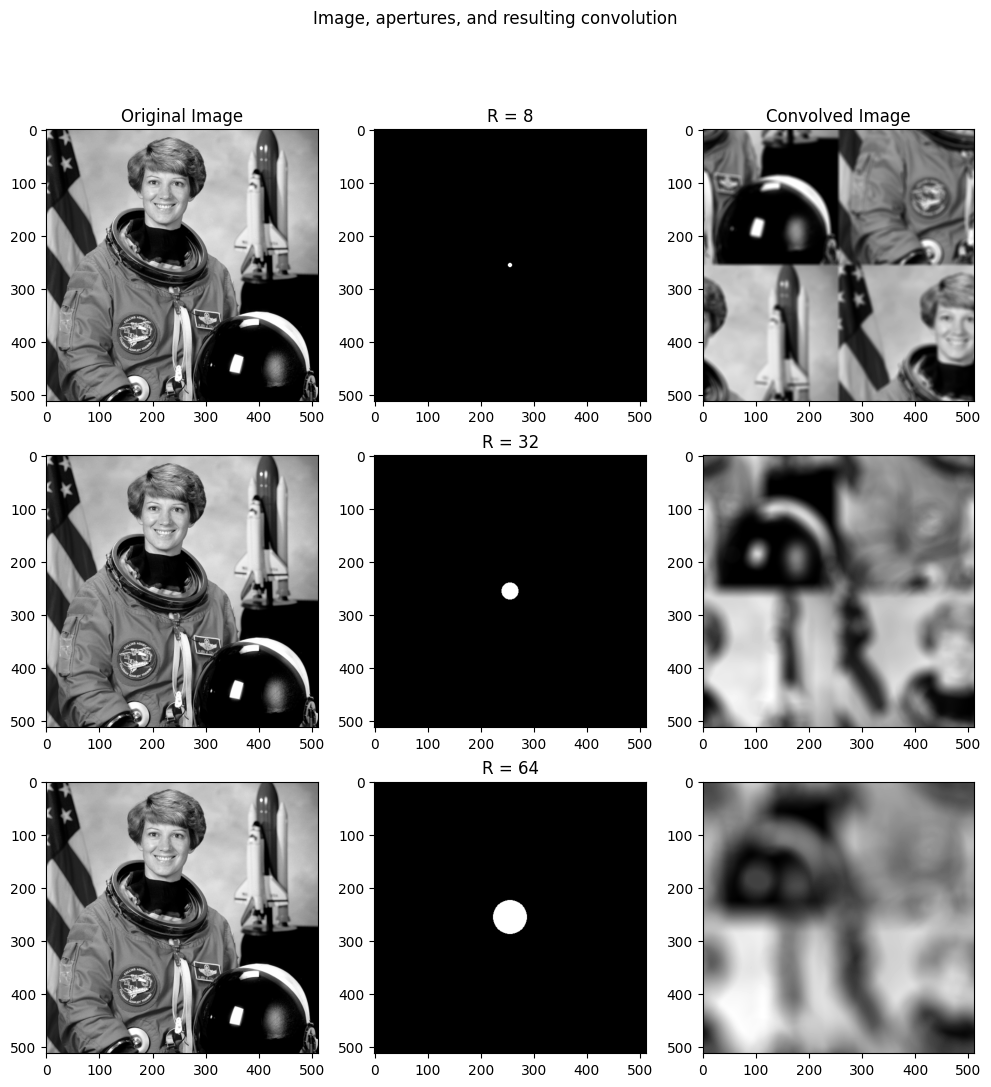

In [11]:
#Get the FFTs of the image and apertures
fftimg = fft2(img)
fftsimg = fftshift(fftimg)
fftapr1 = fft2(a1)
fftsapr1 = fftshift(fftapr1)
fftapr2 = fft2(a2)
fftsapr2 = fftshift(fftapr2)
fftapr3 = fft2(a3)
fftsapr3 = fftshift(fftapr3)
#Apply the apertures
fftp1 = fftapr1*fftimg
fftp2 = fftapr2*fftimg
fftp3 = fftapr3*fftimg
#Revert back to an image by using inverse transform
conv8 = abs(ifft2(fftp1))
conv32 = abs(ifft2(fftp2))
conv64 = abs(ifft2(fftp3))

fig , ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize = [12, 12])
fig.suptitle('Image, apertures, and resulting convolution')
ax1.imshow(img, cmap = 'gray')
ax1.title.set_text('Original Image')
ax2.imshow(a1, cmap = 'gray')
ax2.title.set_text('R = 8')
ax3.imshow(conv8, cmap = 'gray')
ax3.title.set_text('Convolved Image')
ax4.imshow(img, cmap = 'gray')
ax5.imshow(a2, cmap = 'gray')
ax5.title.set_text('R = 32')
ax6.imshow(conv32, cmap = 'gray')
ax7.imshow(img, cmap = 'gray')
ax8.imshow(a3, cmap = 'gray')
ax8.title.set_text('R = 64')
ax9.imshow(conv64, cmap = 'gray')
plt.show()

We can see here that the larger the apertures, the more blurry the image gets

#### PART 3 - Correlation *(20 points)*

In this task, we observe using the correlation method that the similarity between two functions can be extracted-- this is also referred to as template matching.

You can get the test and target images from the "Datasets" folder in the course GDrive:
- AP157_moduleB2_correlation_test_image.png (with text "The Rain in Spain Stays Mainly in the Plain")
- AP157_moduleB2_correlation_target_image.png (with text "A")

In the correlation result, the high intensity portions indicate the presence of letter 'A' on the test image.

To get the correlation, you can perform the ff. steps:

- **Compute Fourier Transforms:**
  - Use `fft2` to compute the 2D Fourier Transform of the input test image (`image`).
  - Use `fft2` and `np.conj` to compute the complex conjugate of the 2D Fourier Transform of the target template.

- **Compute Cross-Correlation in Frequency Domain:**
  - Multiply the Fourier Transforms of the image and the complex conjugate of the Fourier Transform of the target template element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the correlation.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the target image, and the correlation result.
  - Add colorbars to each subplot for reference and to visualize intensity levels.

In [12]:
import skimage.color as skim
import os
import sys
par_path = os.path.abspath(os.path.join('..'))
if par_path not in sys.path:
    sys.path.append(par_path)
data_path = os.path.join(par_path, 'data')

In [13]:
#Call and pad the images for them to have the same dimensions
target = skim.rgb2gray(cv2.imread(os.path.join(data_path, 'AP157_moduleB2_correlation_target_image.png')))
test = skim.rgb2gray(cv2.imread(os.path.join(data_path, 'AP157_moduleB2_correlation_test_image.png')))
tar_pad = cv2.copyMakeBorder(target, 0, 0, 80, 81, borderType= cv2.BORDER_DEFAULT)
test_pad = cv2.copyMakeBorder(test, 3, 2, 0, 0, borderType= cv2.BORDER_DEFAULT)
print(np.shape(tar_pad))
print(np.shape(test_pad))

(1989, 2154)
(1989, 2154)


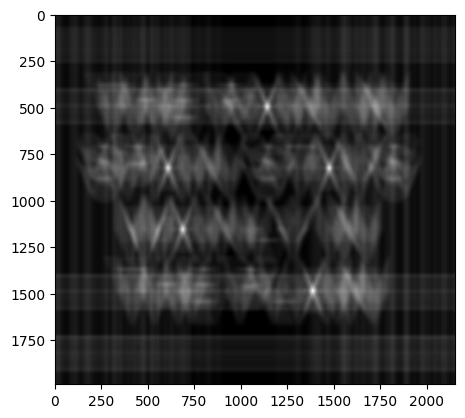

In [14]:
#Get the FFTs, inverses, and apply the target
ffttar = fft2(tar_pad)
ffttest = fft2(test_pad)
fftconj = np.conj(ffttar)
fftprod = ffttest * fftconj
result = abs(fftshift(ifft2(fftprod)))
colorbar = plt.imshow(result, cmap = 'gray')

Here is the resulting corrrelation product

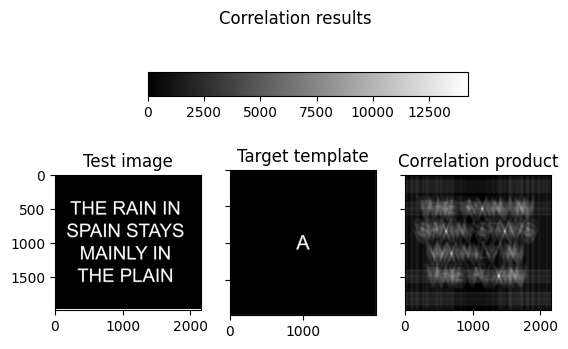

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True)
fig.suptitle('Correlation results')
ax1.imshow(test, cmap = 'gray')
ax1.title.set_text('Test image')
ax2.imshow(target, cmap = 'gray')
ax2.title.set_text('Target template')
ax3.imshow(result, cmap = 'gray')
ax3.title.set_text('Correlation product')
ax = fig.add_axes([0.27, 0.8, 0.5, 0.05])
fig.colorbar(colorbar, cax=ax, orientation='horizontal')
plt.show()

We can see here that the brightest dots are in the middle of where the original photos have the letter 'A', showing that the targets were found in said positions on the test image

#### PART 4 - Application: Canvas Weave Modeling and Removal *(30 points)*

Suppose we want to investigate the brush strokes of a painter. However, the texture of the canvas obscures our view of the brushstrokes. Let’s use FFT to remove the canvas weave.

Perform the ff. steps:

1. Open the image AP157_moduleB_canvas_weave_image.jpg (also in the Datasets folder; the image is from a painting by Dr. Vincent Daria.) and convert into a grayscale image. To enhance the detection of repeating patterns we first subtract the mean grayscale from the image. This will remove the DC bias of intensity images.

2. Take the FT of the mean-subtracted image and take note of the symmetric peaks. These are the sinusoids that make up the canvas weave image, similar to the rotation property of sinusoids we did earlier.

3. Manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is all 1’s but are zero at the locations of the sinusoidal peaks. FFT shift this filter and multiply this to the complex FT of the Red, Green and Blue channels of the original image (not mean subtracted). The filter essentially “erases” the peaks. Take the inverse FT of the filtered FT and overlay the filtered R,G,B images. Did the canvas weave vanish enough that the paint and brushstrokes remain?

4. Invert the filter mask (0's become 1's and vice versa) and take the inverse Fourier transform. Observe the generated modulus image. Is it close to the appearance of the canvas weave?

<function matplotlib.pyplot.show(close=None, block=None)>

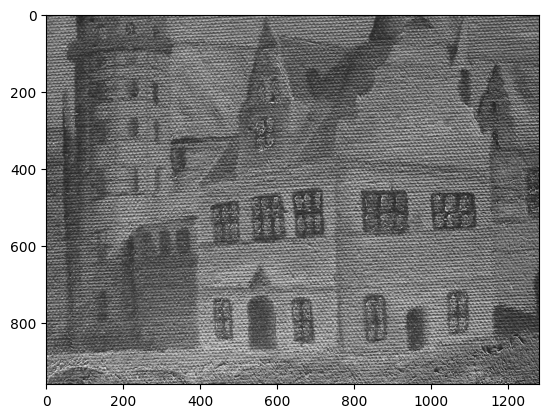

In [16]:
#Load a grayscale and colored image
weavegs = skim.rgb2gray(cv2.imread(os.path.join(data_path, 'AP157_moduleB2_canvas_weave_image.jpg')))
weave = cv2.imread(os.path.join(data_path, 'AP157_moduleB2_canvas_weave_image.jpg'))
plt.imshow(weavegs, cmap = 'gray')
plt.show

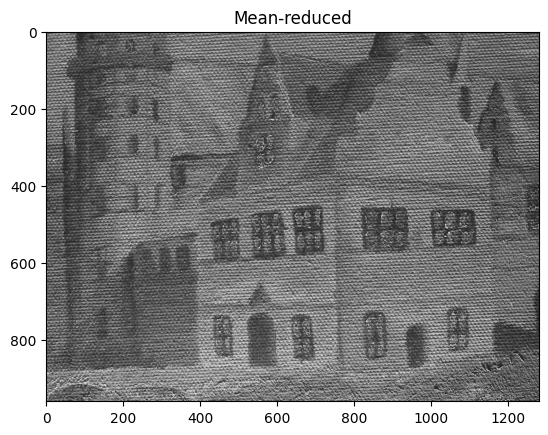

In [17]:
#Get the mean-reduced image
mean = np.sum(weavegs)/len(weavegs)
weave2 = weavegs[:,:] - mean
plt.imshow(weave2,cmap = 'gray')
plt.title('Mean-reduced')
plt.show()

In [23]:
#Get the fft of the mean-reduced value
fftweave = (fft2(weave2))

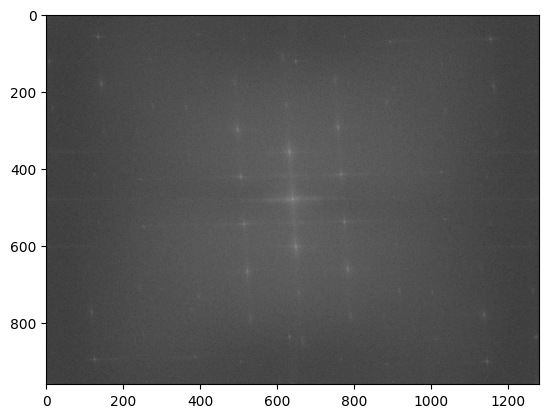

In [25]:
#Get the pattern of the aperture
pattern = np.log(abs(fftshift(fftweave)))
patt2 = pattern
plt.imshow(pattern, cmap ='gray')

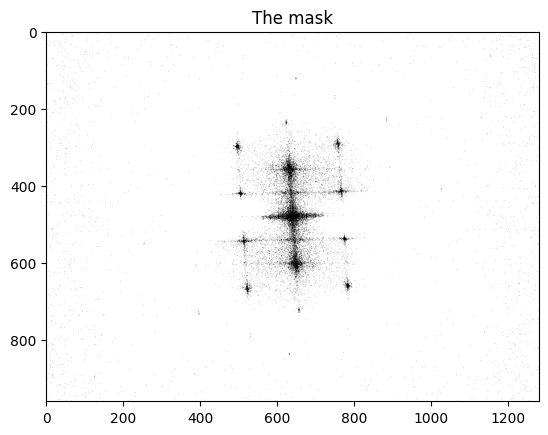

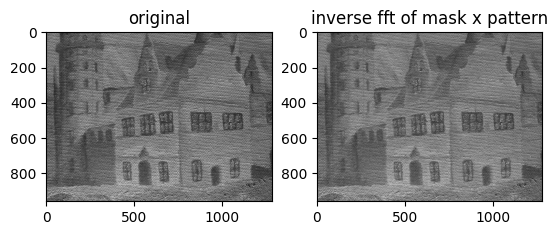

In [35]:
#Create a mask that zeroes out the values in the pattern that corresponds to the peaks
mask = cv2.inRange(patt2, 0, 6)
fftcanv = fftweave*mask
canv = abs(ifft2((fftshift(fftcanv))))
plt.imshow(mask, cmap ='gray')
plt.title('The mask')
plt.show()
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(weavegs, cmap ='gray')
ax1.title.set_text('original')
ax2.imshow((canv*-1), cmap = 'gray')
ax2.title.set_text('inverse fft of mask x pattern')
plt.show()

We can see that there is a subtle difference in the original pattern and the one multiplied with the mask